### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

### Imagem quadrada e com fundo branco

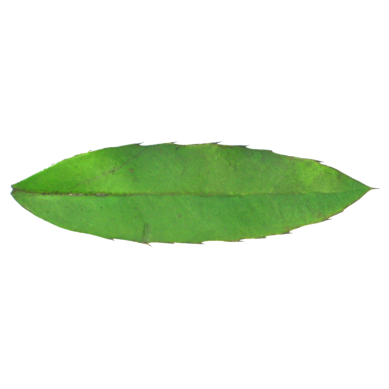

In [2]:
def preprocess_image(imagem):
    # Converter a imagem para escala de cinza
    gray_image = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    
    # Aplicar a limiarização de Otsu para obter uma imagem binarizada
    _, imagem_binaria = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    imagem_invertida = cv2.bitwise_not(imagem_binaria)
    
    # Encontrar os contornos na imagem binarizada
    contornos, _ = cv2.findContours(imagem_invertida, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Encontrar o contorno com a área máxima
    maior_contorno = max(contornos, key=cv2.contourArea)

    # Obter os quatro pontos mais extremos do contorno
    x, y, w, h = cv2.boundingRect(maior_contorno)

    # Determinar o tamanho do lado do quadrado
    tamanho_lado = max(w, h)

    # Criar a imagem RGBA (com canal alfa)
    rgba_imagem = cv2.merge([imagem, imagem_binaria])

    # Definir o canal alfa para 0 (totalmente transparente) nas regiões da folha
    rgba_imagem[imagem_binaria != 0, 0] = 255
    rgba_imagem[imagem_binaria != 0, 1] = 255
    rgba_imagem[imagem_binaria != 0, 2] = 255

    imagem_retrato = rgba_imagem[y:y+h,x:x+w, :3]

    # Calcular o preenchimento necessário para tornar a imagem quadrada
    padding_horizontal = (tamanho_lado - w) // 2
    padding_vertical = (tamanho_lado - h) // 2

    # Aplicar o preenchimento à imagem
    imagem_final = cv2.copyMakeBorder(imagem_retrato, padding_vertical, padding_vertical, padding_horizontal, padding_horizontal, cv2.BORDER_CONSTANT, value=(255, 255, 255))

    # # Redimensionar a imagem para 256x256 e garantir que tenha 3 canais de cor
    # imagem_final = cv2.resize(imagem_padded, (256, 256))

    return imagem_final

# Ler a imagem
img = cv2.imread("/home/rodrigoduarte/Documentos/projeto/imagens/flavia_original/Anhui Barberry/1552.jpg")

# Pré-processar a imagem
nimg = preprocess_image(img)

# Plotar a imagem processada
plt.imshow(cv2.cvtColor(nimg, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Desativar os eixos
plt.show()

### Processar todas as imagens e salvar num novo diretorio

In [17]:
# # Diretório base contendo as classes
# base_dir = "/home/rodrigoduarte/Documentos/projeto/imagens/flavia_original"

# # Diretório de destino para as imagens processadas
# diretorio_destino = "/home/rodrigoduarte/Documentos/projeto/imagens/flavia_processed"

# # Lista de classes
# classes = os.listdir(base_dir)

# # Loop sobre as classes
# for classe in classes:
#     # Caminho para o diretório da classe atual
#     diretorio_classe = os.path.join(base_dir, classe)

#     # Caminho para o diretório de destino para a classe atual
#     diretorio_destino_classe = os.path.join(diretorio_destino, classe)

#     # Lista os arquivos no diretório da classe
#     arquivos = os.listdir(diretorio_classe)

#     # Loop sobre as imagens da classe
#     for arquivo in arquivos:
#         # Caminho completo para a imagem original
#         caminho_imagem = os.path.join(diretorio_classe, arquivo)

#         # Carrega a imagem
#         imagem = cv2.imread(caminho_imagem)

#         # Tornar a imagem quadrada e com fundo branco
#         imagem_processada = preprocess_image(imagem)

#         # Cria o diretório de destino para a classe atual, se ainda não existir
#         if not os.path.exists(diretorio_destino_classe):
#             os.makedirs(diretorio_destino_classe)

#         # Caminho completo para a imagem final de destino
#         caminho_imagem_final = os.path.join(diretorio_destino_classe, os.path.splitext(arquivo)[0] + '.png')

#         # Salva a imagem final
#         cv2.imwrite(caminho_imagem_final, cv2.cvtColor(imagem_processada, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_PNG_COMPRESSION, 0])

In [19]:
# Diretório base contendo as classes
base_dir = "/home/rodrigoduarte/Documentos/projeto/imagens/flavia_original"

# Diretório de destino para as imagens processadas
diretorio_destino = "/home/rodrigoduarte/Documentos/projeto/imagens/flavia_t"

# Lista de classes
classes = os.listdir(base_dir)

# Loop sobre as classes
for classe in classes:
    # Caminho para o diretório da classe atual
    diretorio_classe = os.path.join(base_dir, classe)

    # Caminho para o diretório de destino para a classe atual
    diretorio_destino_classe = os.path.join(diretorio_destino, classe)

    # Lista os arquivos no diretório da classe
    arquivos = os.listdir(diretorio_classe)

    # Loop sobre as imagens da classe
    for arquivo in arquivos:
        # Caminho completo para a imagem original
        caminho_imagem = os.path.join(diretorio_classe, arquivo)

        # Carrega a imagem
        imagem = cv2.imread(caminho_imagem)

        # # Tornar a imagem quadrada e com fundo branco
        # imagem_processada = preprocess_image(imagem)
        imagem = cv2.resize(imagem, (224, 224))

        # Cria o diretório de destino para a classe atual, se ainda não existir
        if not os.path.exists(diretorio_destino_classe):
            os.makedirs(diretorio_destino_classe)

        # Caminho completo para a imagem final de destino
        caminho_imagem_final = os.path.join(diretorio_destino_classe, os.path.splitext(arquivo)[0] + '.png')

        # Salva a imagem final
        cv2.imwrite(caminho_imagem_final, cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR), [cv2.IMWRITE_PNG_COMPRESSION, 0])